In [11]:
import numpy as np
import random
import csv
import os
import time
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm, trange
from RCRI_Net import get_model,get_loss,CustomDataset,DataLoader

In [12]:
dataset  = 'flavia'
DAnumber = '5s'
train_batch_size = 9
train_data = np.load(f"data/retrieval/contour/{dataset}_train_data_{DAnumber}.npy")
train_label = np.load(f"data/retrieval/contour/{dataset}_train_label_{DAnumber}.npy")
train_data = train_data.astype(np.float32)
print(len(train_label))
train_dataset = CustomDataset(train_data, train_label)
train_loader = DataLoader(train_dataset, batch_size=train_batch_size, shuffle=True)

160


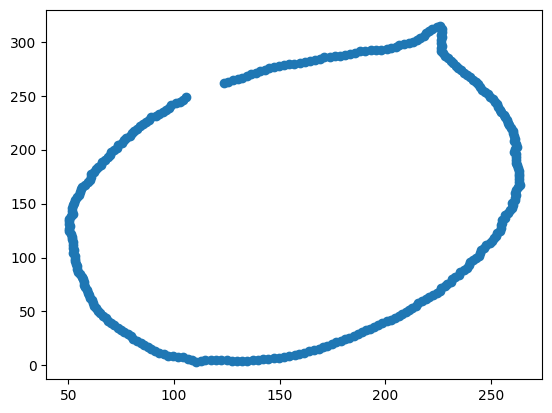

In [13]:
id_img = 13
plt.scatter(train_data[id_img][:,0],train_data[id_img][:,1])

In [14]:
num_class = train_label[-1]+1
print("The number of class is : ",num_class)
Model = get_model(num_class)
Model.cuda()
pytorch_n_params = sum(p.numel() for p in Model.parameters() if p.requires_grad)
print('Total trainable params : ', pytorch_n_params)

The number of class is :  32
Total trainable params :  422624


In [15]:
# Training：
loss_func = get_loss()
loss_func.cuda()
optimizer = torch.optim.Adam(
            Model.parameters(),
            lr=0.001,
            betas=(0.9, 0.999),
            eps=1e-08,
            weight_decay=1e-4
        )
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.7)
global_epoch = 0
global_step = 0
best_instance_acc = 0.0
best_class_acc = 0.0
loss_logger = []
test_loss_logger = []
train_instance_acc_list = []
test_instance_acc_list = []
train_loss = []
test_loss = []
print('Start training...')
for epoch in trange(301):
    mean_correct = []
    for index, (lines,labels) in enumerate(train_loader):
        lines = lines.cuda()
        labels = labels.cuda()
        optimizer.zero_grad()
        pred, trans_feat = Model(lines)
        loss = loss_func(pred, labels.long())
        pred_choice = pred.data.max(1)[1]
        correct = pred_choice.eq(labels.long().data).cpu().sum()
        mean_correct.append(correct.item() / float(lines.size()[0]))
        loss.backward()
        optimizer.step()
    print("Now is Epoch{}: loss = {}".format(epoch+1,loss.item()))
    # Save the Loss and Accuracy
    train_loss.append(loss.item())
    train_instance_acc = np.mean(mean_correct)
    print('Train Instance Accuracy: {}'.format(train_instance_acc))
    train_instance_acc_list.append(train_instance_acc)
    # Every 100 Epochs, a model weight is saved
    if epoch%50==0:
        m_PATH = f"./models/new/{dataset}_{DAnumber}_rec_Epoch_"+str(epoch)+".pth"
        torch.save(Model.state_dict(), m_PATH)

Start training...


  0%|          | 1/301 [00:00<03:48,  1.31it/s]

Now is Epoch1: loss = 2.834995985031128
Train Instance Accuracy: 0.0961199294532628


  1%|          | 2/301 [00:01<03:23,  1.47it/s]

Now is Epoch2: loss = 2.904165029525757
Train Instance Accuracy: 0.27336860670194


  1%|          | 3/301 [00:02<03:15,  1.53it/s]

Now is Epoch3: loss = 2.360294818878174
Train Instance Accuracy: 0.46384479717813054


  1%|▏         | 4/301 [00:02<03:11,  1.55it/s]

Now is Epoch4: loss = 1.7645227909088135
Train Instance Accuracy: 0.5925925925925926


  2%|▏         | 5/301 [00:03<03:08,  1.57it/s]

Now is Epoch5: loss = 1.5595797300338745
Train Instance Accuracy: 0.7063492063492063


  2%|▏         | 6/301 [00:03<03:06,  1.58it/s]

Now is Epoch6: loss = 1.379929780960083
Train Instance Accuracy: 0.7839506172839505


  2%|▏         | 7/301 [00:04<03:04,  1.60it/s]

Now is Epoch7: loss = 1.5005298852920532
Train Instance Accuracy: 0.8641975308641975


  3%|▎         | 8/301 [00:05<03:03,  1.60it/s]

Now is Epoch8: loss = 1.5351074934005737
Train Instance Accuracy: 0.9144620811287479


  3%|▎         | 9/301 [00:05<03:03,  1.59it/s]

Now is Epoch9: loss = 1.0630290508270264
Train Instance Accuracy: 0.9506172839506173


  3%|▎         | 10/301 [00:06<03:01,  1.61it/s]

Now is Epoch10: loss = 0.8487480282783508
Train Instance Accuracy: 0.9365079365079365


  4%|▎         | 11/301 [00:06<02:58,  1.62it/s]

Now is Epoch11: loss = 0.896579384803772
Train Instance Accuracy: 0.9488536155202821


  4%|▍         | 12/301 [00:07<02:56,  1.63it/s]

Now is Epoch12: loss = 0.7579845786094666
Train Instance Accuracy: 0.9814814814814815


  4%|▍         | 13/301 [00:08<02:55,  1.64it/s]

Now is Epoch13: loss = 0.9037768244743347
Train Instance Accuracy: 0.9735449735449735


  5%|▍         | 14/301 [00:08<02:53,  1.65it/s]

Now is Epoch14: loss = 0.46555814146995544
Train Instance Accuracy: 0.9753086419753088


  5%|▍         | 15/301 [00:09<02:49,  1.68it/s]

Now is Epoch15: loss = 0.5171718001365662
Train Instance Accuracy: 0.9938271604938271


  5%|▌         | 16/301 [00:09<02:34,  1.84it/s]

Now is Epoch16: loss = 0.2984277904033661
Train Instance Accuracy: 0.9876543209876544


  6%|▌         | 17/301 [00:10<02:24,  1.96it/s]

Now is Epoch17: loss = 0.5382270812988281
Train Instance Accuracy: 1.0


  6%|▌         | 18/301 [00:10<02:18,  2.04it/s]

Now is Epoch18: loss = 0.49452075362205505
Train Instance Accuracy: 0.9938271604938271


  6%|▋         | 19/301 [00:11<02:14,  2.09it/s]

Now is Epoch19: loss = 0.3534848690032959
Train Instance Accuracy: 0.9753086419753088


  7%|▋         | 20/301 [00:11<02:13,  2.11it/s]

Now is Epoch20: loss = 0.22563672065734863
Train Instance Accuracy: 0.9938271604938271


  7%|▋         | 21/301 [00:12<02:13,  2.10it/s]

Now is Epoch21: loss = 0.17116346955299377
Train Instance Accuracy: 0.9876543209876544


  7%|▋         | 22/301 [00:12<02:12,  2.10it/s]

Now is Epoch22: loss = 0.36256998777389526
Train Instance Accuracy: 1.0


  8%|▊         | 23/301 [00:12<02:10,  2.13it/s]

Now is Epoch23: loss = 0.5670298933982849
Train Instance Accuracy: 0.9920634920634921


  8%|▊         | 24/301 [00:13<02:09,  2.14it/s]

Now is Epoch24: loss = 0.15151438117027283
Train Instance Accuracy: 0.9814814814814815


  8%|▊         | 25/301 [00:13<02:10,  2.11it/s]

Now is Epoch25: loss = 0.19144967198371887
Train Instance Accuracy: 0.9938271604938271


  9%|▊         | 26/301 [00:14<02:12,  2.08it/s]

Now is Epoch26: loss = 0.2515459954738617
Train Instance Accuracy: 1.0


  9%|▉         | 27/301 [00:14<02:10,  2.10it/s]

Now is Epoch27: loss = 0.1538025438785553
Train Instance Accuracy: 0.9876543209876544


  9%|▉         | 28/301 [00:15<02:04,  2.19it/s]

Now is Epoch28: loss = 0.3096880316734314
Train Instance Accuracy: 1.0


 10%|▉         | 29/301 [00:15<02:01,  2.24it/s]

Now is Epoch29: loss = 0.3082880973815918
Train Instance Accuracy: 0.9735449735449736


 10%|▉         | 30/301 [00:16<01:58,  2.29it/s]

Now is Epoch30: loss = 0.08460824936628342
Train Instance Accuracy: 0.9938271604938271


 10%|█         | 31/301 [00:16<01:58,  2.28it/s]

Now is Epoch31: loss = 0.45837321877479553
Train Instance Accuracy: 0.9797178130511465


 11%|█         | 32/301 [00:16<01:56,  2.31it/s]

Now is Epoch32: loss = 0.7005801796913147
Train Instance Accuracy: 0.9797178130511465


 11%|█         | 33/301 [00:17<01:55,  2.33it/s]

Now is Epoch33: loss = 0.24033816158771515
Train Instance Accuracy: 0.9938271604938271


 11%|█▏        | 34/301 [00:17<01:54,  2.32it/s]

Now is Epoch34: loss = 0.13303855061531067
Train Instance Accuracy: 1.0


 12%|█▏        | 35/301 [00:18<01:52,  2.36it/s]

Now is Epoch35: loss = 0.1329505294561386
Train Instance Accuracy: 0.9938271604938271


 12%|█▏        | 36/301 [00:18<01:52,  2.36it/s]

Now is Epoch36: loss = 0.10697933286428452
Train Instance Accuracy: 0.9938271604938271


 12%|█▏        | 37/301 [00:19<01:52,  2.35it/s]

Now is Epoch37: loss = 0.08851076662540436
Train Instance Accuracy: 0.9938271604938271


 13%|█▎        | 38/301 [00:19<01:52,  2.34it/s]

Now is Epoch38: loss = 0.09274165332317352
Train Instance Accuracy: 1.0


 13%|█▎        | 39/301 [00:19<01:53,  2.30it/s]

Now is Epoch39: loss = 0.04866143688559532
Train Instance Accuracy: 1.0


 13%|█▎        | 40/301 [00:20<01:53,  2.30it/s]

Now is Epoch40: loss = 0.03952194005250931
Train Instance Accuracy: 0.9938271604938271


 14%|█▎        | 41/301 [00:20<01:58,  2.20it/s]

Now is Epoch41: loss = 0.20227666199207306
Train Instance Accuracy: 1.0


 14%|█▍        | 42/301 [00:21<01:59,  2.17it/s]

Now is Epoch42: loss = 0.06486585736274719
Train Instance Accuracy: 0.9876543209876544


 14%|█▍        | 43/301 [00:21<01:58,  2.18it/s]

Now is Epoch43: loss = 0.04883631691336632
Train Instance Accuracy: 1.0


 15%|█▍        | 44/301 [00:22<01:56,  2.20it/s]

Now is Epoch44: loss = 0.02246026135981083
Train Instance Accuracy: 1.0


 15%|█▍        | 45/301 [00:22<01:57,  2.18it/s]

Now is Epoch45: loss = 0.21013899147510529
Train Instance Accuracy: 1.0


 15%|█▌        | 46/301 [00:23<01:58,  2.15it/s]

Now is Epoch46: loss = 0.02564016915857792
Train Instance Accuracy: 1.0


 16%|█▌        | 47/301 [00:23<01:58,  2.14it/s]

Now is Epoch47: loss = 0.026358237490057945
Train Instance Accuracy: 1.0


 16%|█▌        | 48/301 [00:24<01:59,  2.11it/s]

Now is Epoch48: loss = 0.05947196111083031
Train Instance Accuracy: 1.0


 16%|█▋        | 49/301 [00:24<01:58,  2.12it/s]

Now is Epoch49: loss = 0.03691154718399048
Train Instance Accuracy: 0.9938271604938271


 17%|█▋        | 50/301 [00:25<01:57,  2.13it/s]

Now is Epoch50: loss = 0.12236837297677994
Train Instance Accuracy: 1.0


 17%|█▋        | 51/301 [00:25<01:59,  2.09it/s]

Now is Epoch51: loss = 0.06183813884854317
Train Instance Accuracy: 1.0


 17%|█▋        | 52/301 [00:26<01:59,  2.09it/s]

Now is Epoch52: loss = 0.10894055664539337
Train Instance Accuracy: 0.9938271604938271


 18%|█▊        | 53/301 [00:26<01:57,  2.11it/s]

Now is Epoch53: loss = 0.01686183363199234
Train Instance Accuracy: 1.0


 18%|█▊        | 54/301 [00:27<01:58,  2.09it/s]

Now is Epoch54: loss = 0.027003373950719833
Train Instance Accuracy: 0.9938271604938271


 18%|█▊        | 55/301 [00:27<01:57,  2.09it/s]

Now is Epoch55: loss = 0.023847369477152824
Train Instance Accuracy: 0.9938271604938271


 19%|█▊        | 56/301 [00:27<01:54,  2.13it/s]

Now is Epoch56: loss = 0.014117504470050335
Train Instance Accuracy: 1.0


 19%|█▉        | 57/301 [00:28<01:52,  2.17it/s]

Now is Epoch57: loss = 0.052226703613996506
Train Instance Accuracy: 1.0


 19%|█▉        | 58/301 [00:28<01:50,  2.19it/s]

Now is Epoch58: loss = 0.03481793776154518
Train Instance Accuracy: 0.9938271604938271


 20%|█▉        | 59/301 [00:29<01:50,  2.20it/s]

Now is Epoch59: loss = 0.0144291240721941
Train Instance Accuracy: 1.0


 20%|█▉        | 60/301 [00:29<01:49,  2.19it/s]

Now is Epoch60: loss = 0.0172323789447546
Train Instance Accuracy: 1.0


 20%|██        | 61/301 [00:30<01:51,  2.15it/s]

Now is Epoch61: loss = 0.08782080560922623
Train Instance Accuracy: 0.9938271604938271


 21%|██        | 62/301 [00:30<01:51,  2.14it/s]

Now is Epoch62: loss = 0.007392908446490765
Train Instance Accuracy: 0.9938271604938271


 21%|██        | 63/301 [00:31<01:54,  2.09it/s]

Now is Epoch63: loss = 0.08183962106704712
Train Instance Accuracy: 0.9876543209876544


 21%|██▏       | 64/301 [00:31<01:52,  2.11it/s]

Now is Epoch64: loss = 0.06708665192127228
Train Instance Accuracy: 0.9938271604938271


 22%|██▏       | 65/301 [00:32<01:50,  2.14it/s]

Now is Epoch65: loss = 0.051247935742139816
Train Instance Accuracy: 1.0


 22%|██▏       | 66/301 [00:32<01:49,  2.15it/s]

Now is Epoch66: loss = 0.05349859222769737
Train Instance Accuracy: 1.0


 22%|██▏       | 67/301 [00:33<01:50,  2.12it/s]

Now is Epoch67: loss = 0.02628820762038231
Train Instance Accuracy: 1.0


 23%|██▎       | 68/301 [00:33<01:51,  2.09it/s]

Now is Epoch68: loss = 0.024844665080308914
Train Instance Accuracy: 1.0


 23%|██▎       | 69/301 [00:34<01:51,  2.08it/s]

Now is Epoch69: loss = 0.09227732568979263
Train Instance Accuracy: 0.9753086419753088


 23%|██▎       | 70/301 [00:34<01:51,  2.08it/s]

Now is Epoch70: loss = 0.43714234232902527
Train Instance Accuracy: 0.9779541446208113


 24%|██▎       | 71/301 [00:35<01:53,  2.04it/s]

Now is Epoch71: loss = 0.024474000558257103
Train Instance Accuracy: 0.9753086419753088


 24%|██▍       | 72/301 [00:35<01:51,  2.05it/s]

Now is Epoch72: loss = 0.03865158557891846
Train Instance Accuracy: 1.0


 24%|██▍       | 73/301 [00:36<01:48,  2.10it/s]

Now is Epoch73: loss = 0.08743055909872055
Train Instance Accuracy: 0.9938271604938271


 25%|██▍       | 74/301 [00:36<01:47,  2.12it/s]

Now is Epoch74: loss = 0.05391843989491463
Train Instance Accuracy: 0.9938271604938271


 25%|██▍       | 75/301 [00:36<01:46,  2.12it/s]

Now is Epoch75: loss = 0.16603468358516693
Train Instance Accuracy: 0.9753086419753088


 25%|██▌       | 76/301 [00:37<01:44,  2.15it/s]

Now is Epoch76: loss = 0.14283086359500885
Train Instance Accuracy: 0.9814814814814815


 26%|██▌       | 77/301 [00:37<01:44,  2.15it/s]

Now is Epoch77: loss = 0.036170635372400284
Train Instance Accuracy: 0.9938271604938271


 26%|██▌       | 78/301 [00:38<01:43,  2.15it/s]

Now is Epoch78: loss = 0.44815024733543396
Train Instance Accuracy: 0.9858906525573192


 26%|██▌       | 79/301 [00:38<01:43,  2.15it/s]

Now is Epoch79: loss = 0.32645758986473083
Train Instance Accuracy: 1.0


 27%|██▋       | 80/301 [00:39<01:41,  2.17it/s]

Now is Epoch80: loss = 0.009879722259938717
Train Instance Accuracy: 0.9876543209876544


 27%|██▋       | 81/301 [00:39<01:40,  2.19it/s]

Now is Epoch81: loss = 0.01186144258826971
Train Instance Accuracy: 0.9876543209876544


 27%|██▋       | 82/301 [00:40<01:40,  2.19it/s]

Now is Epoch82: loss = 0.08348329365253448
Train Instance Accuracy: 1.0


 28%|██▊       | 83/301 [00:40<01:39,  2.19it/s]

Now is Epoch83: loss = 0.035295505076646805
Train Instance Accuracy: 1.0


 28%|██▊       | 84/301 [00:41<01:39,  2.17it/s]

Now is Epoch84: loss = 0.0849011167883873
Train Instance Accuracy: 0.9938271604938271


 28%|██▊       | 85/301 [00:41<01:41,  2.14it/s]

Now is Epoch85: loss = 0.006843631621450186
Train Instance Accuracy: 1.0


 29%|██▊       | 86/301 [00:42<01:41,  2.12it/s]

Now is Epoch86: loss = 0.03120053932070732
Train Instance Accuracy: 1.0


 29%|██▉       | 87/301 [00:42<01:38,  2.16it/s]

Now is Epoch87: loss = 0.00610851077362895
Train Instance Accuracy: 1.0


 29%|██▉       | 88/301 [00:42<01:37,  2.19it/s]

Now is Epoch88: loss = 0.0694485679268837
Train Instance Accuracy: 1.0


 30%|██▉       | 89/301 [00:43<01:35,  2.22it/s]

Now is Epoch89: loss = 0.06580143421888351
Train Instance Accuracy: 1.0


 30%|██▉       | 90/301 [00:43<01:34,  2.23it/s]

Now is Epoch90: loss = 0.08083579689264297
Train Instance Accuracy: 1.0


 30%|███       | 91/301 [00:44<01:34,  2.23it/s]

Now is Epoch91: loss = 0.010754200629889965
Train Instance Accuracy: 1.0


 31%|███       | 92/301 [00:44<01:33,  2.23it/s]

Now is Epoch92: loss = 0.016537277027964592
Train Instance Accuracy: 1.0


 31%|███       | 93/301 [00:45<01:37,  2.13it/s]

Now is Epoch93: loss = 0.010212267749011517
Train Instance Accuracy: 1.0


 31%|███       | 94/301 [00:45<01:36,  2.15it/s]

Now is Epoch94: loss = 0.01211079116910696
Train Instance Accuracy: 1.0


 32%|███▏      | 95/301 [00:46<01:35,  2.15it/s]

Now is Epoch95: loss = 0.05810384824872017
Train Instance Accuracy: 1.0


 32%|███▏      | 96/301 [00:46<01:34,  2.17it/s]

Now is Epoch96: loss = 0.17391332983970642
Train Instance Accuracy: 1.0


 32%|███▏      | 97/301 [00:47<01:33,  2.18it/s]

Now is Epoch97: loss = 0.08906882256269455
Train Instance Accuracy: 1.0


 33%|███▎      | 98/301 [00:47<01:32,  2.20it/s]

Now is Epoch98: loss = 0.12446095049381256
Train Instance Accuracy: 1.0


 33%|███▎      | 99/301 [00:47<01:32,  2.19it/s]

Now is Epoch99: loss = 0.04483048990368843
Train Instance Accuracy: 1.0


 33%|███▎      | 100/301 [00:48<01:32,  2.18it/s]

Now is Epoch100: loss = 0.004853735212236643
Train Instance Accuracy: 1.0


 34%|███▎      | 101/301 [00:48<01:34,  2.11it/s]

Now is Epoch101: loss = 0.09327607601881027
Train Instance Accuracy: 0.9876543209876544


 34%|███▍      | 102/301 [00:49<01:36,  2.07it/s]

Now is Epoch102: loss = 0.4553320109844208
Train Instance Accuracy: 0.9717813051146386


 34%|███▍      | 103/301 [00:49<01:36,  2.05it/s]

Now is Epoch103: loss = 0.05488378927111626
Train Instance Accuracy: 0.9876543209876544


 35%|███▍      | 104/301 [00:50<01:36,  2.05it/s]

Now is Epoch104: loss = 0.1873403638601303
Train Instance Accuracy: 0.9797178130511465


 35%|███▍      | 105/301 [00:50<01:36,  2.04it/s]

Now is Epoch105: loss = 0.039601463824510574
Train Instance Accuracy: 0.9938271604938271


 35%|███▌      | 106/301 [00:51<01:35,  2.04it/s]

Now is Epoch106: loss = 0.1912301778793335
Train Instance Accuracy: 0.9814814814814814


 36%|███▌      | 107/301 [00:51<01:35,  2.04it/s]

Now is Epoch107: loss = 0.008408110588788986
Train Instance Accuracy: 0.9876543209876544


 36%|███▌      | 108/301 [00:52<01:33,  2.05it/s]

Now is Epoch108: loss = 0.12936602532863617
Train Instance Accuracy: 0.9876543209876544


 36%|███▌      | 109/301 [00:52<01:33,  2.06it/s]

Now is Epoch109: loss = 0.09981701523065567
Train Instance Accuracy: 0.9876543209876544


 37%|███▋      | 110/301 [00:53<01:33,  2.04it/s]

Now is Epoch110: loss = 0.042088091373443604
Train Instance Accuracy: 0.9691358024691357


 37%|███▋      | 111/301 [00:53<01:33,  2.04it/s]

Now is Epoch111: loss = 0.1133359745144844
Train Instance Accuracy: 0.9876543209876544


 37%|███▋      | 112/301 [00:54<01:32,  2.05it/s]

Now is Epoch112: loss = 0.023786569014191628
Train Instance Accuracy: 1.0


 38%|███▊      | 113/301 [00:54<01:31,  2.05it/s]

Now is Epoch113: loss = 0.011271508410573006
Train Instance Accuracy: 1.0


 38%|███▊      | 114/301 [00:55<01:31,  2.05it/s]

Now is Epoch114: loss = 0.059866152703762054
Train Instance Accuracy: 0.9938271604938271


 38%|███▊      | 115/301 [00:55<01:30,  2.05it/s]

Now is Epoch115: loss = 0.15913550555706024
Train Instance Accuracy: 1.0


 39%|███▊      | 116/301 [00:56<01:30,  2.05it/s]

Now is Epoch116: loss = 0.0298526119440794
Train Instance Accuracy: 0.9938271604938271


 39%|███▉      | 117/301 [00:56<01:28,  2.07it/s]

Now is Epoch117: loss = 0.07676028460264206
Train Instance Accuracy: 0.9876543209876544


 39%|███▉      | 118/301 [00:57<01:28,  2.06it/s]

Now is Epoch118: loss = 0.553558886051178
Train Instance Accuracy: 0.9656084656084657


 40%|███▉      | 119/301 [00:57<01:28,  2.05it/s]

Now is Epoch119: loss = 0.048033393919467926
Train Instance Accuracy: 0.9814814814814815


 40%|███▉      | 120/301 [00:58<01:28,  2.04it/s]

Now is Epoch120: loss = 0.029767604544758797
Train Instance Accuracy: 0.9691358024691357


 40%|████      | 121/301 [00:58<01:30,  1.99it/s]

Now is Epoch121: loss = 0.10943043977022171
Train Instance Accuracy: 0.9938271604938271


 41%|████      | 122/301 [00:59<01:29,  1.99it/s]

Now is Epoch122: loss = 0.03403808921575546
Train Instance Accuracy: 0.9938271604938271


 41%|████      | 123/301 [00:59<01:30,  1.96it/s]

Now is Epoch123: loss = 0.018181269988417625
Train Instance Accuracy: 0.9938271604938271


 41%|████      | 124/301 [01:00<01:30,  1.96it/s]

Now is Epoch124: loss = 0.03355324640870094
Train Instance Accuracy: 0.9938271604938271


 42%|████▏     | 125/301 [01:00<01:29,  1.97it/s]

Now is Epoch125: loss = 0.04037410393357277
Train Instance Accuracy: 0.9753086419753088


 42%|████▏     | 126/301 [01:01<01:29,  1.96it/s]

Now is Epoch126: loss = 0.007694509346038103
Train Instance Accuracy: 0.9938271604938271


 42%|████▏     | 127/301 [01:01<01:29,  1.95it/s]

Now is Epoch127: loss = 0.04013633355498314
Train Instance Accuracy: 1.0


 43%|████▎     | 128/301 [01:02<01:28,  1.94it/s]

Now is Epoch128: loss = 0.003695565043017268
Train Instance Accuracy: 1.0


 43%|████▎     | 129/301 [01:02<01:29,  1.93it/s]

Now is Epoch129: loss = 0.040585339069366455
Train Instance Accuracy: 0.9691358024691357


 43%|████▎     | 130/301 [01:03<01:28,  1.93it/s]

Now is Epoch130: loss = 0.01584501378238201
Train Instance Accuracy: 1.0


 44%|████▎     | 131/301 [01:03<01:26,  1.97it/s]

Now is Epoch131: loss = 0.02351711131632328
Train Instance Accuracy: 1.0


 44%|████▍     | 132/301 [01:04<01:23,  2.01it/s]

Now is Epoch132: loss = 0.04102494195103645
Train Instance Accuracy: 0.9938271604938271


 44%|████▍     | 133/301 [01:04<01:23,  2.02it/s]

Now is Epoch133: loss = 0.012044310569763184
Train Instance Accuracy: 0.9876543209876544


 45%|████▍     | 134/301 [01:05<01:22,  2.02it/s]

Now is Epoch134: loss = 0.05707116052508354
Train Instance Accuracy: 1.0


 45%|████▍     | 135/301 [01:05<01:20,  2.05it/s]

Now is Epoch135: loss = 0.04120846837759018
Train Instance Accuracy: 0.9938271604938271


 45%|████▌     | 136/301 [01:06<01:19,  2.08it/s]

Now is Epoch136: loss = 0.08624941855669022
Train Instance Accuracy: 1.0


 46%|████▌     | 137/301 [01:06<01:18,  2.09it/s]

Now is Epoch137: loss = 0.08088356256484985
Train Instance Accuracy: 1.0


 46%|████▌     | 138/301 [01:07<01:18,  2.06it/s]

Now is Epoch138: loss = 0.097600556910038
Train Instance Accuracy: 1.0


 46%|████▌     | 139/301 [01:07<01:18,  2.06it/s]

Now is Epoch139: loss = 0.001552464673295617
Train Instance Accuracy: 1.0


 47%|████▋     | 140/301 [01:08<01:17,  2.06it/s]

Now is Epoch140: loss = 0.004108988214284182
Train Instance Accuracy: 1.0


 47%|████▋     | 141/301 [01:08<01:17,  2.06it/s]

Now is Epoch141: loss = 0.03927909955382347
Train Instance Accuracy: 0.9876543209876544


 47%|████▋     | 142/301 [01:09<01:17,  2.05it/s]

Now is Epoch142: loss = 0.013357686810195446
Train Instance Accuracy: 0.9876543209876544


 48%|████▊     | 143/301 [01:09<01:16,  2.06it/s]

Now is Epoch143: loss = 0.023793453350663185
Train Instance Accuracy: 0.9938271604938271


 48%|████▊     | 144/301 [01:10<01:16,  2.05it/s]

Now is Epoch144: loss = 0.03848990425467491
Train Instance Accuracy: 1.0


 48%|████▊     | 145/301 [01:10<01:16,  2.03it/s]

Now is Epoch145: loss = 0.008734096772968769
Train Instance Accuracy: 0.9938271604938271


 49%|████▊     | 146/301 [01:11<01:17,  1.99it/s]

Now is Epoch146: loss = 0.008482655510306358
Train Instance Accuracy: 0.9938271604938271


 49%|████▉     | 147/301 [01:11<01:18,  1.97it/s]

Now is Epoch147: loss = 0.009724296629428864
Train Instance Accuracy: 1.0


 49%|████▉     | 148/301 [01:12<01:17,  1.97it/s]

Now is Epoch148: loss = 0.15521155297756195
Train Instance Accuracy: 0.9920634920634921


 50%|████▉     | 149/301 [01:12<01:17,  1.97it/s]

Now is Epoch149: loss = 0.00508377468213439
Train Instance Accuracy: 0.9938271604938271


 50%|████▉     | 150/301 [01:13<01:16,  1.97it/s]

Now is Epoch150: loss = 0.01840902678668499
Train Instance Accuracy: 1.0


 50%|█████     | 151/301 [01:13<01:16,  1.96it/s]

Now is Epoch151: loss = 0.04919866472482681
Train Instance Accuracy: 1.0


 50%|█████     | 152/301 [01:14<01:15,  1.98it/s]

Now is Epoch152: loss = 0.011640614829957485
Train Instance Accuracy: 1.0


 51%|█████     | 153/301 [01:14<01:14,  1.98it/s]

Now is Epoch153: loss = 0.00663357600569725
Train Instance Accuracy: 0.9938271604938271


 51%|█████     | 154/301 [01:15<01:14,  1.96it/s]

Now is Epoch154: loss = 0.004629363305866718
Train Instance Accuracy: 0.9938271604938271


 51%|█████▏    | 155/301 [01:15<01:17,  1.90it/s]

Now is Epoch155: loss = 0.0025700374972075224
Train Instance Accuracy: 1.0


 52%|█████▏    | 156/301 [01:16<01:15,  1.92it/s]

Now is Epoch156: loss = 0.004037563223391771
Train Instance Accuracy: 1.0


 52%|█████▏    | 157/301 [01:16<01:14,  1.92it/s]

Now is Epoch157: loss = 0.021405231207609177
Train Instance Accuracy: 0.9876543209876544


 52%|█████▏    | 158/301 [01:17<01:13,  1.94it/s]

Now is Epoch158: loss = 0.009274406358599663
Train Instance Accuracy: 1.0


 53%|█████▎    | 159/301 [01:17<01:13,  1.94it/s]

Now is Epoch159: loss = 0.0409548319876194
Train Instance Accuracy: 0.9938271604938271


 53%|█████▎    | 160/301 [01:18<01:12,  1.96it/s]

Now is Epoch160: loss = 0.0017734358552843332
Train Instance Accuracy: 1.0


 53%|█████▎    | 161/301 [01:18<01:11,  1.96it/s]

Now is Epoch161: loss = 0.0376187302172184
Train Instance Accuracy: 1.0


 54%|█████▍    | 162/301 [01:19<01:10,  1.97it/s]

Now is Epoch162: loss = 0.038946397602558136
Train Instance Accuracy: 0.9876543209876544


 54%|█████▍    | 163/301 [01:19<01:09,  1.98it/s]

Now is Epoch163: loss = 0.010710489936172962
Train Instance Accuracy: 0.9814814814814815


 54%|█████▍    | 164/301 [01:20<01:09,  1.98it/s]

Now is Epoch164: loss = 0.014465543441474438
Train Instance Accuracy: 1.0


 55%|█████▍    | 165/301 [01:20<01:09,  1.97it/s]

Now is Epoch165: loss = 0.01017689611762762
Train Instance Accuracy: 0.9938271604938271


 55%|█████▌    | 166/301 [01:21<01:08,  1.98it/s]

Now is Epoch166: loss = 0.006146102678030729
Train Instance Accuracy: 1.0


 55%|█████▌    | 167/301 [01:21<01:05,  2.04it/s]

Now is Epoch167: loss = 0.08010624349117279
Train Instance Accuracy: 0.9876543209876544


 56%|█████▌    | 168/301 [01:22<01:04,  2.07it/s]

Now is Epoch168: loss = 0.016953326761722565
Train Instance Accuracy: 1.0


 56%|█████▌    | 169/301 [01:22<01:01,  2.15it/s]

Now is Epoch169: loss = 0.005922245793044567
Train Instance Accuracy: 0.9938271604938271


 56%|█████▋    | 170/301 [01:23<00:59,  2.20it/s]

Now is Epoch170: loss = 0.15512999892234802
Train Instance Accuracy: 0.9858906525573192


 57%|█████▋    | 171/301 [01:23<00:58,  2.21it/s]

Now is Epoch171: loss = 0.03679601103067398
Train Instance Accuracy: 1.0


 57%|█████▋    | 172/301 [01:24<00:58,  2.19it/s]

Now is Epoch172: loss = 0.0007742071757093072
Train Instance Accuracy: 1.0


 57%|█████▋    | 173/301 [01:24<00:59,  2.16it/s]

Now is Epoch173: loss = 0.002289971336722374
Train Instance Accuracy: 0.9938271604938271


 58%|█████▊    | 174/301 [01:25<00:59,  2.14it/s]

Now is Epoch174: loss = 0.0009968342492356896
Train Instance Accuracy: 0.9938271604938271


 58%|█████▊    | 175/301 [01:25<01:01,  2.05it/s]

Now is Epoch175: loss = 0.008013800717890263
Train Instance Accuracy: 0.9691358024691359


 58%|█████▊    | 176/301 [01:26<01:02,  1.99it/s]

Now is Epoch176: loss = 0.3699682354927063
Train Instance Accuracy: 0.9673721340388008


 59%|█████▉    | 177/301 [01:26<01:02,  1.98it/s]

Now is Epoch177: loss = 0.04207500442862511
Train Instance Accuracy: 0.9753086419753088


 59%|█████▉    | 178/301 [01:27<01:02,  1.98it/s]

Now is Epoch178: loss = 0.41039904952049255
Train Instance Accuracy: 0.955026455026455


 59%|█████▉    | 179/301 [01:27<01:01,  2.00it/s]

Now is Epoch179: loss = 0.18641039729118347
Train Instance Accuracy: 0.9444444444444444


 60%|█████▉    | 180/301 [01:28<01:00,  2.00it/s]

Now is Epoch180: loss = 0.13323351740837097
Train Instance Accuracy: 0.9382716049382717


 60%|██████    | 181/301 [01:28<00:59,  2.01it/s]

Now is Epoch181: loss = 0.27448776364326477
Train Instance Accuracy: 0.9488536155202821


 60%|██████    | 182/301 [01:29<01:00,  1.95it/s]

Now is Epoch182: loss = 0.047976166009902954
Train Instance Accuracy: 0.9753086419753088


 61%|██████    | 183/301 [01:29<01:00,  1.96it/s]

Now is Epoch183: loss = 0.11758197098970413
Train Instance Accuracy: 0.9753086419753088


 61%|██████    | 184/301 [01:30<00:58,  1.99it/s]

Now is Epoch184: loss = 0.05789805203676224
Train Instance Accuracy: 1.0


 61%|██████▏   | 185/301 [01:30<00:56,  2.04it/s]

Now is Epoch185: loss = 0.1601283848285675
Train Instance Accuracy: 0.9797178130511465


 62%|██████▏   | 186/301 [01:31<00:55,  2.07it/s]

Now is Epoch186: loss = 0.028916459530591965
Train Instance Accuracy: 0.9938271604938271


 62%|██████▏   | 187/301 [01:31<00:55,  2.04it/s]

Now is Epoch187: loss = 0.133039191365242
Train Instance Accuracy: 0.9814814814814815


 62%|██████▏   | 188/301 [01:32<00:56,  2.02it/s]

Now is Epoch188: loss = 0.007381358649581671
Train Instance Accuracy: 0.9876543209876544


 63%|██████▎   | 189/301 [01:32<00:55,  2.02it/s]

Now is Epoch189: loss = 0.007804041262716055
Train Instance Accuracy: 0.9814814814814814


 63%|██████▎   | 190/301 [01:33<00:55,  2.00it/s]

Now is Epoch190: loss = 0.0041137514635920525
Train Instance Accuracy: 0.9876543209876544


 63%|██████▎   | 191/301 [01:33<00:57,  1.91it/s]

Now is Epoch191: loss = 0.0018322373507544398
Train Instance Accuracy: 1.0


 64%|██████▍   | 192/301 [01:34<01:00,  1.79it/s]

Now is Epoch192: loss = 0.08159762620925903
Train Instance Accuracy: 0.9938271604938271


 64%|██████▍   | 193/301 [01:34<01:02,  1.72it/s]

Now is Epoch193: loss = 0.06804647296667099
Train Instance Accuracy: 1.0


 64%|██████▍   | 194/301 [01:35<01:03,  1.68it/s]

Now is Epoch194: loss = 0.009620661847293377
Train Instance Accuracy: 1.0


 65%|██████▍   | 195/301 [01:36<01:04,  1.64it/s]

Now is Epoch195: loss = 0.0030026989988982677
Train Instance Accuracy: 0.9938271604938271


 65%|██████▌   | 196/301 [01:36<01:05,  1.60it/s]

Now is Epoch196: loss = 0.04037243872880936
Train Instance Accuracy: 1.0


 65%|██████▌   | 197/301 [01:37<01:05,  1.60it/s]

Now is Epoch197: loss = 0.0040677739307284355
Train Instance Accuracy: 1.0


 66%|██████▌   | 198/301 [01:38<01:04,  1.60it/s]

Now is Epoch198: loss = 0.2647894620895386
Train Instance Accuracy: 0.9920634920634921


 66%|██████▌   | 199/301 [01:38<01:03,  1.59it/s]

Now is Epoch199: loss = 0.0004638165992219001
Train Instance Accuracy: 1.0


 66%|██████▋   | 200/301 [01:39<01:03,  1.60it/s]

Now is Epoch200: loss = 0.009694448672235012
Train Instance Accuracy: 1.0


 67%|██████▋   | 201/301 [01:40<01:03,  1.57it/s]

Now is Epoch201: loss = 0.006048311945050955
Train Instance Accuracy: 0.9876543209876544


 67%|██████▋   | 202/301 [01:40<01:03,  1.56it/s]

Now is Epoch202: loss = 0.0026635415852069855
Train Instance Accuracy: 0.9938271604938271


 67%|██████▋   | 203/301 [01:41<01:02,  1.56it/s]

Now is Epoch203: loss = 0.003306957660242915
Train Instance Accuracy: 0.9876543209876544


 68%|██████▊   | 204/301 [01:42<01:01,  1.56it/s]

Now is Epoch204: loss = 0.1218312606215477
Train Instance Accuracy: 0.9920634920634921


 68%|██████▊   | 205/301 [01:42<01:00,  1.57it/s]

Now is Epoch205: loss = 0.0010886747622862458
Train Instance Accuracy: 0.9876543209876544


 68%|██████▊   | 206/301 [01:43<01:00,  1.58it/s]

Now is Epoch206: loss = 0.027001243084669113
Train Instance Accuracy: 0.9938271604938271


 69%|██████▉   | 207/301 [01:43<00:59,  1.57it/s]

Now is Epoch207: loss = 0.011195637285709381
Train Instance Accuracy: 0.9938271604938271


 69%|██████▉   | 208/301 [01:44<00:59,  1.57it/s]

Now is Epoch208: loss = 0.0020379829220473766
Train Instance Accuracy: 0.9938271604938271


 69%|██████▉   | 209/301 [01:45<00:58,  1.57it/s]

Now is Epoch209: loss = 0.06746102124452591
Train Instance Accuracy: 0.9938271604938271


 70%|██████▉   | 210/301 [01:45<00:58,  1.56it/s]

Now is Epoch210: loss = 0.0019263093126937747
Train Instance Accuracy: 0.9938271604938271


 70%|███████   | 211/301 [01:46<00:57,  1.57it/s]

Now is Epoch211: loss = 0.09206550568342209
Train Instance Accuracy: 1.0


 70%|███████   | 212/301 [01:47<00:56,  1.57it/s]

Now is Epoch212: loss = 0.04137405753135681
Train Instance Accuracy: 1.0


 71%|███████   | 213/301 [01:47<00:56,  1.57it/s]

Now is Epoch213: loss = 0.001018670154735446
Train Instance Accuracy: 1.0


 71%|███████   | 214/301 [01:48<00:55,  1.57it/s]

Now is Epoch214: loss = 0.0003929838421754539
Train Instance Accuracy: 1.0


 71%|███████▏  | 215/301 [01:48<00:54,  1.58it/s]

Now is Epoch215: loss = 0.006489005405455828
Train Instance Accuracy: 0.9876543209876544


 72%|███████▏  | 216/301 [01:49<00:53,  1.58it/s]

Now is Epoch216: loss = 0.010198335163295269
Train Instance Accuracy: 1.0


 72%|███████▏  | 217/301 [01:50<00:53,  1.56it/s]

Now is Epoch217: loss = 0.08658142387866974
Train Instance Accuracy: 1.0


 72%|███████▏  | 218/301 [01:50<00:53,  1.56it/s]

Now is Epoch218: loss = 0.04155156761407852
Train Instance Accuracy: 1.0


 73%|███████▎  | 219/301 [01:51<00:52,  1.56it/s]

Now is Epoch219: loss = 0.0022670221514999866
Train Instance Accuracy: 1.0


 73%|███████▎  | 220/301 [01:52<00:51,  1.56it/s]

Now is Epoch220: loss = 0.017724130302667618
Train Instance Accuracy: 1.0


 73%|███████▎  | 221/301 [01:52<00:50,  1.57it/s]

Now is Epoch221: loss = 0.024614188820123672
Train Instance Accuracy: 0.9938271604938271


 74%|███████▍  | 222/301 [01:53<00:49,  1.58it/s]

Now is Epoch222: loss = 0.0015439236303791404
Train Instance Accuracy: 1.0


 74%|███████▍  | 223/301 [01:54<00:49,  1.59it/s]

Now is Epoch223: loss = 0.057605497539043427
Train Instance Accuracy: 1.0


 74%|███████▍  | 224/301 [01:54<00:48,  1.57it/s]

Now is Epoch224: loss = 0.004933984484523535
Train Instance Accuracy: 1.0


 75%|███████▍  | 225/301 [01:55<00:47,  1.58it/s]

Now is Epoch225: loss = 0.041318442672491074
Train Instance Accuracy: 1.0


 75%|███████▌  | 226/301 [01:56<00:47,  1.56it/s]

Now is Epoch226: loss = 0.0010551896411925554
Train Instance Accuracy: 1.0


 75%|███████▌  | 227/301 [01:56<00:49,  1.49it/s]

Now is Epoch227: loss = 0.0021852271165698767
Train Instance Accuracy: 1.0


 76%|███████▌  | 228/301 [01:57<00:50,  1.43it/s]

Now is Epoch228: loss = 0.005356405396014452
Train Instance Accuracy: 1.0


 76%|███████▌  | 229/301 [01:58<00:51,  1.40it/s]

Now is Epoch229: loss = 0.05917677655816078
Train Instance Accuracy: 0.9938271604938271


 76%|███████▋  | 230/301 [01:59<00:51,  1.37it/s]

Now is Epoch230: loss = 0.0019631111063063145
Train Instance Accuracy: 1.0


 77%|███████▋  | 231/301 [01:59<00:51,  1.36it/s]

Now is Epoch231: loss = 0.1058216467499733
Train Instance Accuracy: 1.0


 77%|███████▋  | 232/301 [02:00<00:51,  1.35it/s]

Now is Epoch232: loss = 0.005159362684935331
Train Instance Accuracy: 1.0


 77%|███████▋  | 233/301 [02:01<00:50,  1.34it/s]

Now is Epoch233: loss = 0.06469143182039261
Train Instance Accuracy: 1.0


 78%|███████▊  | 234/301 [02:02<00:50,  1.32it/s]

Now is Epoch234: loss = 0.03528318554162979
Train Instance Accuracy: 1.0


 78%|███████▊  | 235/301 [02:02<00:50,  1.31it/s]

Now is Epoch235: loss = 0.002568722004070878
Train Instance Accuracy: 1.0


 78%|███████▊  | 236/301 [02:03<00:49,  1.32it/s]

Now is Epoch236: loss = 0.002197632333263755
Train Instance Accuracy: 1.0


 79%|███████▊  | 237/301 [02:04<00:48,  1.33it/s]

Now is Epoch237: loss = 0.005590211134403944
Train Instance Accuracy: 1.0


 79%|███████▉  | 238/301 [02:05<00:47,  1.32it/s]

Now is Epoch238: loss = 0.0439663864672184
Train Instance Accuracy: 0.9876543209876544


 79%|███████▉  | 239/301 [02:05<00:46,  1.32it/s]

Now is Epoch239: loss = 0.010662076994776726
Train Instance Accuracy: 1.0


 80%|███████▉  | 240/301 [02:06<00:46,  1.32it/s]

Now is Epoch240: loss = 0.010255304165184498
Train Instance Accuracy: 0.9938271604938271


 80%|████████  | 241/301 [02:07<00:45,  1.32it/s]

Now is Epoch241: loss = 0.270027756690979
Train Instance Accuracy: 0.9920634920634921


 80%|████████  | 242/301 [02:08<00:44,  1.32it/s]

Now is Epoch242: loss = 0.006863708607852459
Train Instance Accuracy: 1.0


 81%|████████  | 243/301 [02:08<00:43,  1.32it/s]

Now is Epoch243: loss = 0.06136548891663551
Train Instance Accuracy: 1.0


 81%|████████  | 244/301 [02:09<00:42,  1.33it/s]

Now is Epoch244: loss = 0.013533120974898338
Train Instance Accuracy: 1.0


 81%|████████▏ | 245/301 [02:10<00:42,  1.33it/s]

Now is Epoch245: loss = 0.00014574613305740058
Train Instance Accuracy: 1.0


 82%|████████▏ | 246/301 [02:11<00:41,  1.33it/s]

Now is Epoch246: loss = 0.0019298546249046922
Train Instance Accuracy: 1.0


 82%|████████▏ | 247/301 [02:11<00:40,  1.33it/s]

Now is Epoch247: loss = 0.010987657122313976
Train Instance Accuracy: 0.9938271604938271


 82%|████████▏ | 248/301 [02:12<00:39,  1.33it/s]

Now is Epoch248: loss = 0.00451066205278039
Train Instance Accuracy: 1.0


 83%|████████▎ | 249/301 [02:13<00:39,  1.33it/s]

Now is Epoch249: loss = 0.00511981500312686
Train Instance Accuracy: 1.0


 83%|████████▎ | 250/301 [02:14<00:38,  1.33it/s]

Now is Epoch250: loss = 0.0007343890029005706
Train Instance Accuracy: 0.9938271604938271


 83%|████████▎ | 251/301 [02:14<00:37,  1.32it/s]

Now is Epoch251: loss = 0.0014307304518297315
Train Instance Accuracy: 1.0


 84%|████████▎ | 252/301 [02:15<00:37,  1.32it/s]

Now is Epoch252: loss = 0.004686031956225634
Train Instance Accuracy: 1.0


 84%|████████▍ | 253/301 [02:16<00:36,  1.33it/s]

Now is Epoch253: loss = 0.003230097470805049
Train Instance Accuracy: 1.0


 84%|████████▍ | 254/301 [02:17<00:35,  1.33it/s]

Now is Epoch254: loss = 0.0007337628630921245
Train Instance Accuracy: 0.9938271604938271


 85%|████████▍ | 255/301 [02:17<00:34,  1.32it/s]

Now is Epoch255: loss = 0.007280836347490549
Train Instance Accuracy: 0.9938271604938271


 85%|████████▌ | 256/301 [02:18<00:33,  1.33it/s]

Now is Epoch256: loss = 0.0021658858750015497
Train Instance Accuracy: 1.0


 85%|████████▌ | 257/301 [02:19<00:33,  1.33it/s]

Now is Epoch257: loss = 0.0013409146340563893
Train Instance Accuracy: 1.0


 86%|████████▌ | 258/301 [02:20<00:32,  1.31it/s]

Now is Epoch258: loss = 0.02225816249847412
Train Instance Accuracy: 1.0


 86%|████████▌ | 259/301 [02:20<00:31,  1.31it/s]

Now is Epoch259: loss = 0.005048923660069704
Train Instance Accuracy: 1.0


 86%|████████▋ | 260/301 [02:21<00:31,  1.31it/s]

Now is Epoch260: loss = 0.0021519840229302645
Train Instance Accuracy: 1.0


 87%|████████▋ | 261/301 [02:22<00:30,  1.32it/s]

Now is Epoch261: loss = 0.0028259342070668936
Train Instance Accuracy: 1.0


 87%|████████▋ | 262/301 [02:23<00:29,  1.31it/s]

Now is Epoch262: loss = 0.00160346704069525
Train Instance Accuracy: 1.0


 87%|████████▋ | 263/301 [02:24<00:28,  1.32it/s]

Now is Epoch263: loss = 0.0353146456182003
Train Instance Accuracy: 1.0


 88%|████████▊ | 264/301 [02:24<00:28,  1.32it/s]

Now is Epoch264: loss = 0.03028431348502636
Train Instance Accuracy: 1.0


 88%|████████▊ | 265/301 [02:25<00:27,  1.30it/s]

Now is Epoch265: loss = 0.001468697446398437
Train Instance Accuracy: 1.0


 88%|████████▊ | 266/301 [02:26<00:26,  1.30it/s]

Now is Epoch266: loss = 0.09275181591510773
Train Instance Accuracy: 1.0


 89%|████████▊ | 267/301 [02:27<00:25,  1.31it/s]

Now is Epoch267: loss = 0.06096118316054344
Train Instance Accuracy: 0.9938271604938271


 89%|████████▉ | 268/301 [02:27<00:25,  1.31it/s]

Now is Epoch268: loss = 0.0029830860439687967
Train Instance Accuracy: 1.0


 89%|████████▉ | 269/301 [02:28<00:24,  1.31it/s]

Now is Epoch269: loss = 0.028652053326368332
Train Instance Accuracy: 1.0


 90%|████████▉ | 270/301 [02:29<00:23,  1.31it/s]

Now is Epoch270: loss = 0.0006428271881304681
Train Instance Accuracy: 1.0


 90%|█████████ | 271/301 [02:30<00:22,  1.31it/s]

Now is Epoch271: loss = 0.06115623936057091
Train Instance Accuracy: 1.0


 90%|█████████ | 272/301 [02:30<00:22,  1.29it/s]

Now is Epoch272: loss = 0.005246080458164215
Train Instance Accuracy: 1.0


 91%|█████████ | 273/301 [02:31<00:21,  1.30it/s]

Now is Epoch273: loss = 0.35477685928344727
Train Instance Accuracy: 0.9920634920634921


 91%|█████████ | 274/301 [02:32<00:20,  1.31it/s]

Now is Epoch274: loss = 0.01402963511645794
Train Instance Accuracy: 0.9876543209876544


 91%|█████████▏| 275/301 [02:33<00:19,  1.37it/s]

Now is Epoch275: loss = 0.0158245749771595
Train Instance Accuracy: 0.9938271604938271


 92%|█████████▏| 276/301 [02:33<00:17,  1.43it/s]

Now is Epoch276: loss = 0.6588779091835022
Train Instance Accuracy: 0.9673721340388006


 92%|█████████▏| 277/301 [02:34<00:16,  1.48it/s]

Now is Epoch277: loss = 0.0008865191484801471
Train Instance Accuracy: 0.9876543209876544


 92%|█████████▏| 278/301 [02:34<00:15,  1.51it/s]

Now is Epoch278: loss = 0.06251993030309677
Train Instance Accuracy: 0.9691358024691357


 93%|█████████▎| 279/301 [02:35<00:14,  1.51it/s]

Now is Epoch279: loss = 0.025567738339304924
Train Instance Accuracy: 0.9876543209876544


 93%|█████████▎| 280/301 [02:36<00:13,  1.54it/s]

Now is Epoch280: loss = 0.08880109339952469
Train Instance Accuracy: 0.9753086419753088


 93%|█████████▎| 281/301 [02:36<00:12,  1.55it/s]

Now is Epoch281: loss = 0.1242537572979927
Train Instance Accuracy: 0.9814814814814815


 94%|█████████▎| 282/301 [02:37<00:12,  1.57it/s]

Now is Epoch282: loss = 0.4523741900920868
Train Instance Accuracy: 0.9858906525573192


 94%|█████████▍| 283/301 [02:38<00:11,  1.58it/s]

Now is Epoch283: loss = 0.018598362803459167
Train Instance Accuracy: 1.0


 94%|█████████▍| 284/301 [02:38<00:10,  1.59it/s]

Now is Epoch284: loss = 0.04040989652276039
Train Instance Accuracy: 1.0


 95%|█████████▍| 285/301 [02:39<00:10,  1.58it/s]

Now is Epoch285: loss = 0.003877533134073019
Train Instance Accuracy: 0.9876543209876544


 95%|█████████▌| 286/301 [02:40<00:09,  1.58it/s]

Now is Epoch286: loss = 0.013765444047749043
Train Instance Accuracy: 0.9876543209876544


 95%|█████████▌| 287/301 [02:40<00:08,  1.59it/s]

Now is Epoch287: loss = 0.4562476575374603
Train Instance Accuracy: 0.9426807760141094


 96%|█████████▌| 288/301 [02:41<00:08,  1.59it/s]

Now is Epoch288: loss = 1.048073649406433
Train Instance Accuracy: 0.9470899470899471


 96%|█████████▌| 289/301 [02:41<00:07,  1.59it/s]

Now is Epoch289: loss = 0.21543338894844055
Train Instance Accuracy: 0.955026455026455


 96%|█████████▋| 290/301 [02:42<00:06,  1.60it/s]

Now is Epoch290: loss = 0.023867513984441757
Train Instance Accuracy: 0.95679012345679


 97%|█████████▋| 291/301 [02:43<00:06,  1.58it/s]

Now is Epoch291: loss = 0.09608662128448486
Train Instance Accuracy: 0.9876543209876544


 97%|█████████▋| 292/301 [02:43<00:05,  1.57it/s]

Now is Epoch292: loss = 0.08101547509431839
Train Instance Accuracy: 0.9876543209876544


 97%|█████████▋| 293/301 [02:44<00:05,  1.57it/s]

Now is Epoch293: loss = 0.4551112949848175
Train Instance Accuracy: 0.9611992945326278


 98%|█████████▊| 294/301 [02:45<00:04,  1.57it/s]

Now is Epoch294: loss = 0.5438122153282166
Train Instance Accuracy: 0.9673721340388008


 98%|█████████▊| 295/301 [02:45<00:03,  1.57it/s]

Now is Epoch295: loss = 0.07367877662181854
Train Instance Accuracy: 0.9753086419753088


 98%|█████████▊| 296/301 [02:46<00:03,  1.57it/s]

Now is Epoch296: loss = 0.022788753733038902
Train Instance Accuracy: 0.9876543209876544


 99%|█████████▊| 297/301 [02:47<00:02,  1.56it/s]

Now is Epoch297: loss = 0.21621689200401306
Train Instance Accuracy: 0.9797178130511465


 99%|█████████▉| 298/301 [02:47<00:01,  1.58it/s]

Now is Epoch298: loss = 0.06604478508234024
Train Instance Accuracy: 0.9876543209876544


 99%|█████████▉| 299/301 [02:48<00:01,  1.58it/s]

Now is Epoch299: loss = 0.0599527545273304
Train Instance Accuracy: 0.9938271604938271


100%|█████████▉| 300/301 [02:48<00:00,  1.59it/s]

Now is Epoch300: loss = 0.04228512570261955
Train Instance Accuracy: 0.9938271604938271


100%|██████████| 301/301 [02:49<00:00,  1.78it/s]

Now is Epoch301: loss = 0.014508488588035107
Train Instance Accuracy: 0.9938271604938271
